In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.datasets import make_classification        
from sklearn import preprocessing
import pandas as pd
import numpy as np
pd.set_option('future.no_silent_downcasting', True)

# SEQUENTIAL LEARNING 
## HIGH PRECISON AND HIGH RECALL

In [5]:
# you might want to modify the path 
df_train = pd.read_csv("uc2_train")
df_test = pd.read_csv("uc2_test")

In [7]:
df_train

,id,ini_timestamp,feat_orig_pkts_mean,feat_resp_pkts_mean,feat_orig_bytes_mean,feat_resp_bytes_mean,feat_mean_duration,feat_conn_state_dns_ratio,feat_conn_state_http_ratio,feat_conn_state_ssl_ratio,...,feat_method_ssl_ratio,feat_method_dhcp_ratio,feat_method_unk_ratio,feat_method_irc_ratio,feat_proto_tcp_ratio,feat_proto_udp_ratio,feat_proto_icmp_ratio,feat_private_conn_ratio,label,detailed_label
0,192.168.1.132,2018-10-25 12:20:37.400158976,1.000000,1.000000,76.000000,76.000000,0.270332,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,1,Bening,Benign
1,192.168.1.195,2019-09-20 17:40:41.665906944,2.000000,2.000000,152.000000,152.000000,0.007746,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,1,Bening,Benign
2,192.168.1.132,2018-10-25 17:08:37.400158976,1.000000,1.000000,76.000000,76.000000,0.016972,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,1,Bening,Benign
3,192.168.1.195,2019-09-20 20:14:41.665906944,2.000000,2.000000,152.000000,152.000000,0.005371,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,2,Bening,Benign
4,192.168.1.200,2019-02-28 19:27:33.981529856,3.986335,0.003075,239.147323,0.161243,1.581535,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.999317,0.000683,0.0,11709,Malicious,PartOfAHorizontalPortScan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0.0.0.0,2018-09-21 13:14:22.965529856,10.000000,0.000000,3280.000000,0.000000,59.690766,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,1,Bening,Benign
305,192.168.1.195,2019-09-20 02:10:41.665906944,2.000000,2.000000,152.000000,152.000000,0.007746,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,1,Bening,Benign
306,192.168.1.195,2019-09-20 09:12:41.665906944,2.000000,0.000000,152.000000,0.000000,0.000004,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,1,Bening,Benign
307,0.0.0.0,2018-09-21 13:00:22.965529856,10.000000,0.000000,3280.000000,0.000000,59.221614,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,1,Bening,Benign


In [8]:
df_train = df_train.sort_values(['ini_timestamp']).reset_index(drop=True)

In [9]:
df_test = df_test.sort_values(['ini_timestamp']).reset_index(drop=True)

In [10]:
data = pd.concat([df_train,df_test])

In [11]:
data['id'].unique()

array(['0.0.0.0', '192.168.2.3', '169.254.15.115', '192.168.1.132',
       '192.168.1.200', '192.168.1.195', '192.168.2.1',
       'fe80::482:6d20:b3e:adf4', 'fe80::1847:a1bd:8d13:f43c',
       '184.103.250.171'], dtype=object)

In [12]:
data = data.drop(["id","ini_timestamp"],axis=1)

In [13]:
data

,feat_orig_pkts_mean,feat_resp_pkts_mean,feat_orig_bytes_mean,feat_resp_bytes_mean,feat_mean_duration,feat_conn_state_dns_ratio,feat_conn_state_http_ratio,feat_conn_state_ssl_ratio,feat_conn_state_dhcp_ratio,feat_conn_state_unk_ratio,...,feat_method_ssl_ratio,feat_method_dhcp_ratio,feat_method_unk_ratio,feat_method_irc_ratio,feat_proto_tcp_ratio,feat_proto_udp_ratio,feat_proto_icmp_ratio,feat_private_conn_ratio,label,detailed_label
0,1.000000e+01,0.000000,3.280000e+03,0.0,60.591687,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,1,Bening,Benign
1,1.200000e+01,0.000000,3.939000e+03,0.0,58.447015,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,1,Bening,Benign
2,6.800000e+00,4.800000,2.989600e+03,1266.2,60.076710,0.000000,0.0,0.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.800000,0.200000,0.000000,5,Bening,Benign
3,8.500000e+00,7.500000,2.201500e+03,2763.5,4.386164,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.500000,0.500000,0.000000,2,Bening,Benign
4,3.066667e+00,1.866667,1.933333e+02,191.2,20.113941,0.333333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.666667,0.266667,0.066667,15,Bening,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,2.788857e+06,0.000000,8.087687e+07,0.0,694.164927,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,3,Malicious,DDoS
714,2.869943e+06,0.000000,8.322835e+07,0.0,797.333834,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,1,Malicious,DDoS
715,2.000000e+00,0.000000,1.520000e+02,0.0,0.000003,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,1,Bening,Benign
716,2.000000e+00,2.000000,1.520000e+02,152.0,0.007507,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,1,Bening,Benign


In [14]:
y_vec = data["label"].replace("Bening","Benign")

In [15]:
(y_vec).value_counts() 

label
Benign       695
Malicious    332
Name: count, dtype: int64

In [16]:
data = data.drop(["detailed_label","label"],axis=1)

In [17]:
y_vec = y_vec.replace("Benign",-1)

In [18]:
y_vec = y_vec.replace("Malicious",1)

In [19]:
def PAL(data,y_vec):
  if not isinstance(data,pd.DataFrame):
    data = pd.DataFrame(data)
    y_vec = pd.Series(y_vec)
  w = np.zeros(len(data.columns))
  y_pred = np.ones(len(data))
    ########################################################################
  for i in range(len(data)):
    ########################################################################
    x = data.iloc[i,:]
    y_pred[i] = np.sign(x.dot(w))
    #######################################################################
    y = y_vec.iloc[i]
    #loss = 1-y*y_pred[i]
    #######################################################################
    loss = 1-y*y_pred[i]
    #######################################################################
    l2_norm = x.dot(x)**.5
    eta = loss/l2_norm
    w += eta*y*x
    #######################################################################
  return y_pred,w

In [20]:
y_pred,w = PAL(data,y_vec)

In [21]:
report = classification_report(y_vec[1:].astype(float),pd.Series(y_pred[1:]), output_dict=True)

In [22]:
# Categories for the classification
categories = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'

# Extracting precision, recall, and f1-score
precision = [report[category]['precision'] for category in categories]
recall = [report[category]['recall'] for category in categories]
f1_score = [report[category]['f1-score'] for category in categories]

# Setting the positions and width for the bars
pos = list(range(len(categories)))
width = 0.25

In [23]:
f1_score

[0.9740634005763689, 0.9457831325301205]

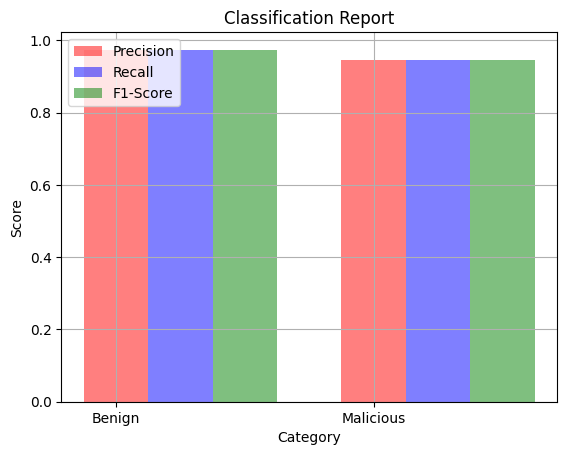

In [24]:
# Setting the positions and width for the bars
pos = list(range(len(categories)))
width = 0.25

# Plotting each metric
plt.bar(pos, precision, width, alpha=0.5, color='red', label='Precision')
plt.bar([p + width for p in pos], recall, width, alpha=0.5, color='blue', label='Recall')
plt.bar([p + width*2 for p in pos], f1_score, width, alpha=0.5, color='green', label='F1-Score')

# Adding the aesthetics
plt.xlabel('Category')
plt.ylabel('Score')
plt.title('Classification Report')
plt.xticks([p + width for p in pos], categories)
plt.xticks(pos, ["Benign","Malicious"])
plt.legend(['Precision', 'Recall', 'F1-Score'], loc='upper left')
plt.grid()
plt.show()

In [48]:
cm = confusion_matrix(y_vec[1:].astype(float),pd.Series(y_pred[1:]),labels=[-1,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Benign","Malicious"])

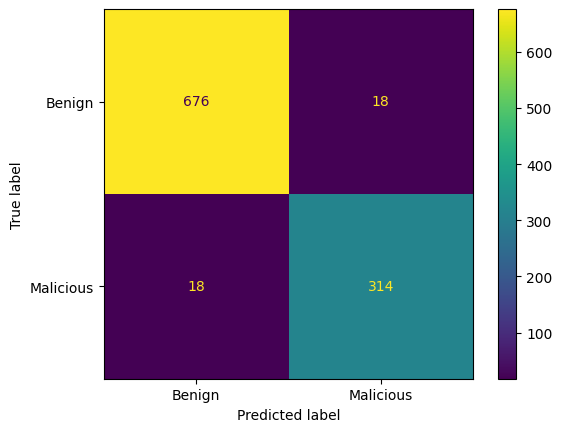

In [49]:
disp.plot()